Ex1 Kmeans

In [75]:
from sklearn.cluster import KMeans
import numpy as np

In [76]:
X = np.array([[1, 1], [1, 2], [2, 1], [2, 1.5], [3, 2], [4, 1.5], [4, 2], [5, 1.5], [4.5, 2], [4, 4], [4.5, 4], [4.5, 5], [4, 5], [5, 5]])

In [77]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(X)

In [78]:
kmeans.labels_

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [79]:
kmeans.predict([[0, 0], [12, 3]])

array([2, 0])

In [80]:
kmeans.cluster_centers_

array([[4.4  , 4.6  ],
       [4.1  , 1.8  ],
       [1.5  , 1.375]])

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [82]:
y_kmeans=kmeans.predict(X)

In [83]:
y_kmeans

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

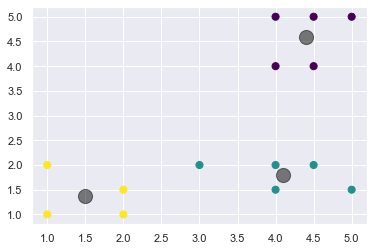

In [84]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5)

Ex2: k-NN Classifier

In [54]:
import pandas as pd
import numpy as np

In [55]:
data = [[1, 1, 1], [1, 2, 1], [1, 3, 1], [2, 1, 1], [2, 2, 1], [2, 3, 1], [2, 3.5, 1], [2.5, 2, 1], [3.5, 1, 1], [3.5, 2, 1], [3.5, 3, 2], [3.5, 4, 2], [4.5, 1, 2], [4.5, 2, 2], [4.5, 3, 2], [5, 4, 2], [5, 5, 2], [6, 3, 2], [6, 4, 2], [6, 5, 2]]

In [56]:
df = pd.DataFrame(data, columns = ["feature 1", "feature 2", "class"])

In [57]:
df

,feature 1,feature 2,class
0,1.0,1.0,1
1,1.0,2.0,1
2,1.0,3.0,1
3,2.0,1.0,1
4,2.0,2.0,1
5,2.0,3.0,1
6,2.0,3.5,1
7,2.5,2.0,1
8,3.5,1.0,1
9,3.5,2.0,1


In [58]:
A = np.array(data)
Y = A[:, -1]
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2.])

In [59]:
X = A[:, [0, 1]]
X

array([[1. , 1. ],
       [1. , 2. ],
       [1. , 3. ],
       [2. , 1. ],
       [2. , 2. ],
       [2. , 3. ],
       [2. , 3.5],
       [2.5, 2. ],
       [3.5, 1. ],
       [3.5, 2. ],
       [3.5, 3. ],
       [3.5, 4. ],
       [4.5, 1. ],
       [4.5, 2. ],
       [4.5, 3. ],
       [5. , 4. ],
       [5. , 5. ],
       [6. , 3. ],
       [6. , 4. ],
       [6. , 5. ]])

In [60]:
from sklearn.neighbors import NearestCentroid
model = NearestCentroid()
model.fit(X, Y)

NearestCentroid()

In [61]:
model.centroids_

array([[2.05, 2.05],
       [4.85, 3.4 ]])

In [62]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 2)

In [63]:
neigh.fit(X, Y)

KNeighborsClassifier(n_neighbors=2)

In [64]:
neigh.predict([[3.8, 3.1]])

array([2.])

Ex3: Naive Bayes Classifier

In [65]:
import pandas as pd
import numpy as np

In [66]:
data = [[1, 'Thick', '+'],
       [2, 'Thick', '+'],
       [3, 'Thin', '+'],
       [4, 'Thin', '+'],
       [5, 'Thin', '-'],
       [6, 'Thick', '-'],
       [7, 'Thick', '-'],
       [8, 'Thick', '-']]

In [67]:
df = pd.DataFrame(data, columns=['Sample ID', 'Size', 'Class'])
df

,Sample ID,Size,Class
0,1,Thick,+
1,2,Thick,+
2,3,Thin,+
3,4,Thin,+
4,5,Thin,-
5,6,Thick,-
6,7,Thick,-
7,8,Thick,-


In [68]:
pd.crosstab(df['Size'], df['Class'], margins = True, normalize = "index")

Class,+,-
Size,,
Thick,0.400000,0.600000
Thin,0.666667,0.333333
All,0.500000,0.500000


In [71]:
df1 = df.replace({'Thick': 1, 'Thin': 0, '+': 1, '-': 0})
df1

,Sample ID,Size,Class
0,1,1,1
1,2,1,1
2,3,0,1
3,4,0,1
4,5,0,0
5,6,1,0
6,7,1,0
7,8,1,0


In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
gnb = GaussianNB()
X_train = np.array(df1.iloc[:,1]).reshape(-1, 1)
Y_train = df1.iloc[:, -1]
model = gnb.fit(X_train, Y_train)

In [74]:
model.predict([[0]])

array([1], dtype=int64)